# Project: Wrangling Data For WeRateDogs Twitter Archive
## by : Olatunde Ashiru

## Data Gathering
In the cells below, we gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing the required libraries for reading data.

import pandas as pd
import numpy as np
import requests as rq
import os

In [2]:
# Reading the twitter-archive-enchanced.csv file into pandas as a Dataframe
# Named as rating_puppies to align with the WeRateDogs twitter account.

rating_puppies = pd.read_csv('twitter-archive-enhanced.csv')
rating_puppies

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

# Save HTML to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv("image-predictions.tsv",sep="\t" )
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# importing required libraries for creating Twitter API object

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
# Creating access key as a JSON object

file = open('key.json', 'r')
my_keys = json.load(file)

In [7]:
# Creating the API object

consumer_key = my_keys['consumer_key']
consumer_secret = my_keys['consumer_secret']
access_token = my_keys['access_token']
access_secret = my_keys['access_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
#Assigning the values of tweet_id in the rating_puppies table to tweet_ids

tweet_ids = rating_puppies.tweet_id.values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [12]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 265


Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933: 754011816964026368
Fail
934

Rate limit reached. Sleeping for: 226


Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
18

In [10]:
# List of dictionaries to build file by file and later convert to a DataFrame
tweets_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
                                
                                
        # Append to list of dictionaries
        tweets_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
       
    #Building DataFrame 
additional_tweets_df = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [11]:
#Reading additional tweets
additional_tweets_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33809
1,892177421306343426,5301,29332
2,891815181378084864,3481,22052
3,891689557279858688,7225,36938
4,891327558926688256,7760,35311
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


## Assessing Data
In this section, we detect and document at least **eight (8) quality issues and two (2) tidiness issue**. We use **both** visual assessment
programmatic assessement to assess the data.

* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.



In [12]:
rating_puppies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# Checking datatype in 'timestamp' column

type(rating_puppies.timestamp[1])

str

In [14]:
# Count of each values in 'name' column

rating_puppies.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Emma          1
Horace        1
Dewey         1
Napolean      1
Mingus        1
Name: name, Length: 957, dtype: int64

In [15]:
# Checking the unique values in the name columns.
rating_puppies.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [16]:
# Using the unique values in the 'name' column 
# to check the text' of dogs having 'name' "a".

puppies_name_a = rating_puppies[rating_puppies.name == 'a']
puppies_name_a.text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [17]:
# Using the unique values in the 'name' column 
# to check the text' of dogs having 'name' "None".

puppies_name_none = rating_puppies[rating_puppies.name == 'None']
puppies_name_none.text

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
                              ...                        
2342    Here we have a well-established sunblockerspan...
2343    Let's hope this flight isn't Malaysian (lol). ...
2344    Here we have a northern speckled Rhododendron....
2351    Here we have a 1949 1st generation vulpix. Enj...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 745, dtype: object

In [18]:
# Using the unique values in the 'name' column 
# to check the text' of dogs having 'name' "very".


puppies_name_very = rating_puppies[rating_puppies.name == 'very']
puppies_name_very.text

773     RT @dog_rates: We only rate dogs. Pls stop sen...
819     We only rate dogs. Pls stop sending in non-can...
1031    We only rate dogs. Pls stop sending in non-can...
1097    We only rate dogs. Please stop sending in non-...
1385    We only rate dogs. Pls stop sending in non-can...
Name: text, dtype: object

In [19]:
# Using the unique values in the 'name' column 
# to check the text' of dogs having 'name' "all".


puppies_name_all = rating_puppies[rating_puppies.name == 'all']
puppies_name_all.text

1138    This is all I want in my life. 12/10 for super...
Name: text, dtype: object

In [20]:
# Using the unique values in the 'name' column 
# to check the text' of dogs having 'name' "O".


puppies_name_O = rating_puppies[rating_puppies.name == 'O']
puppies_name_O.text

775    This is O'Malley. That is how he sleeps. Doesn...
Name: text, dtype: object

#### Assessing the image_prediction table

In [21]:
# Checking information for datatypes of columns
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Dog Status count for each prediction
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [23]:
# Dog Status count for second prediction

image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [24]:
# Dog Status count for third prediction
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [25]:
image_predictions.tweet_id.duplicated().sum()

0

#### Assessing the tweets_df table

In [26]:
additional_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [27]:
additional_tweets_df.tweet_id.duplicated().sum()

0

### Quality issues

#### `rating_puppies` table
1. Five columns having large amount of missing values in the rating_puppies table.

2. The `expanded_urls ` column looks like a repeat of the `tweet_id` column.

3. `Source` column is an HTML tag with the required content.

4. Erroneous datatype for `Timestamp` 

5. Nulls represented as (None) in doggo, floofer,pupper, and puppo columns

6. The `name` column with "very" aren't dogs judging from the `text`column, and the name 'O' is actually O'Malley.

#### `image_predictions` table

7. Mixture of Uppercase letter and lowercase used for the first character of values in columns `p1`,`p2`,and `p3`

#### `additional_tweets_df` table

8. Missing records in the tweets_df table (29) **Can't Clean yet**



### Tidiness issues
1. Timestamp column with combined information for the Date, Day and Time of tweet.

2. image_prediction tables containing 3 seperate predictions

## Cleaning Data
In this section, we clean **all** of the issues we documented while assessing. 

**Note:** We Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
rating_puppies_clean = rating_puppies.copy()
image_predictions_clean = image_predictions.copy()
additional_tweets_df_clean = additional_tweets_df.copy()

### Quality Issue #1:  Five columns having large amount of missing values in the rating_puppies table.

#### Define: 

Dropping these columns with pandas.drop() function because they aren't needed for analysis

#### Code

In [29]:
# Checking for list of columns before dropping 
rating_puppies_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [30]:
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                   'retweeted_status_timestamp']

rating_puppies_clean.drop(columns =columns_to_drop, axis =1, inplace =True)

#### Test

In [31]:
# Checking to confirm if the columns have been dropped
rating_puppies_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Quality Issue #2:The `expanded_urls`  column looks like a repeat of the `tweet_id` column.

#### Define

The expanded_urls column is dropped because the last part of the string in the URLs is a repeat of the tweet_id.

#### Code

In [32]:
rating_puppies_clean.drop('expanded_urls', axis = 1, inplace =True)

#### Test

In [33]:
# Checking to confirm if the 'expanded_urls' column have been dropped

rating_puppies_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality Issue #3: source column is an HTML tag with the required content.

#### Define

Using `str` function, `pandas.Series.extract` function and `regular expression` to extract the content in the tags

#### Code

In [34]:
# Checking the values of the source column before extraction
rating_puppies_clean['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [35]:
rating_puppies_clean['source'] = rating_puppies_clean.source.str.extract(">([\w\s]*)<", expand=True)

#### Test

In [36]:
# # Checking the values of the source column after extraction
rating_puppies_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [37]:
rating_puppies_clean['source'].value_counts()

Twitter for iPhone    2221
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

### Quality Issue #4: Erroneous datatype for `Timestamp` .

#### Define

Converting `timestamp` column datatype to datetime64[ns] using pandas **to_datetime** function

#### Code

In [38]:
rating_puppies_clean['timestamp'] = pd.to_datetime(rating_puppies_clean['timestamp'])

#### Test

In [39]:
# Checking the rating_puppies again
rating_puppies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2265 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


In [40]:
rating_puppies_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Tidiness Issue #1: Timestamp column with combined information for the Date, Year, Month, Day and Time of tweet.

#### Define

Extracting the date, year, month, day, and time a tweet was created using pandas.Series.datetime methods. Then Dropping the `timestamp` column

#### Code

In [41]:
rating_puppies_clean['tweet_date'] = rating_puppies_clean.timestamp.dt.date
rating_puppies_clean['tweet_year'] = rating_puppies_clean.timestamp.dt.year
rating_puppies_clean['tweet_month'] = rating_puppies_clean.timestamp.dt.month
rating_puppies_clean['tweet_day'] = rating_puppies_clean.timestamp.dt.weekday_name
rating_puppies_clean['tweet_time'] = rating_puppies_clean.timestamp.dt.time
rating_puppies_clean.drop('timestamp', axis =1, inplace = True)
rating_puppies_clean.sample(3)


,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time
1757,678764513869611008,Twitter for iPhone,Meet Wilson. He got caught humping the futon. ...,10,10,Wilson,None,None,None,None,2015-12-21,2015,12,Monday,02:30:45
871,761599872357261312,Twitter for iPhone,"This is Sephie. According to this picture, she...",11,10,Sephie,None,None,None,None,2016-08-05,2016,8,Friday,16:28:54
1783,677673981332312066,Twitter for iPhone,Endangered triangular pup here. Could be a wiz...,9,10,None,None,None,None,None,2015-12-18,2015,12,Friday,02:17:22


#### Test

In [42]:
# Checking if the tweet_day, tweet_month, tweet_date, and tweet_time columns has been created
rating_puppies_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017-08-01,2017,8,Tuesday,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017-08-01,2017,8,Tuesday,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017-07-31,2017,7,Monday,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017-07-30,2017,7,Sunday,15:58:51
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017-07-29,2017,7,Saturday,16:00:24


 ### Quality Issue #5: Nulls represented as  (None) in doggo, floofer,pupper, and puppo columns

#### Define
Replacing the None string with NaN values using `np.nan`, and drop the columns.

#### Code

In [43]:
# Replacing the None string values in the rating_puppies_clean table with
# Nan value to reflect the actual entry
# in the features

rep_dog_stage = ['doggo','floofer','pupper','puppo']
rating_puppies_clean[rep_dog_stage] = rating_puppies_clean[rep_dog_stage]. replace({'None':np.nan})
rating_puppies_clean.drop(rep_dog_stage, axis =1, inplace = True)
rating_puppies_clean.sample(4)

,tweet_id,source,text,rating_numerator,rating_denominator,name,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time
227,848324959059550208,Twitter for iPhone,Meet Odin. He's supposed to be giving directio...,12,10,Odin,2017-04-02,2017,4,Sunday,00:03:26
2096,670755717859713024,Twitter for iPhone,Say hello to Gin &amp; Tonic. They're having a...,9,10,Gin,2015-11-29,2015,11,Sunday,00:06:39
1317,706593038911545345,Twitter for iPhone,Here's a sneak peek of me on spring break. 10/...,10,10,None,2016-03-06,2016,3,Sunday,21:31:22
2172,669327207240699904,Twitter for iPhone,Just got home from college. Dis my dog. She do...,13,10,None,2015-11-25,2015,11,Wednesday,01:30:16


#### Test

In [44]:
# checking to see if the columns have been dropped
rating_puppies_clean.head(4)

,tweet_id,source,text,rating_numerator,rating_denominator,name,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017-08-01,2017,8,Tuesday,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017-08-01,2017,8,Tuesday,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31,2017,7,Monday,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30,2017,7,Sunday,15:58:51


### Quality Issue #6: The `name` column with "very" aren't dogs judging from the `text` column, and the  name 'O' is actually "O'Malley".

#### Define
Dropping the rows with name as "very" and replacing "O" with "O'Malley". And Capitalizing the values in the name column with `str.title()` function

#### Code

In [45]:
rating_puppies_clean = rating_puppies_clean[rating_puppies_clean.name != "very"]
rating_puppies_clean['name'] = rating_puppies_clean['name']. replace({'O':"O'Malley"})
rating_puppies_clean['name'] = rating_puppies_clean['name'].str.title() 

#### Test

In [46]:
rating_puppies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2351 non-null int64
source                2260 non-null object
text                  2351 non-null object
rating_numerator      2351 non-null int64
rating_denominator    2351 non-null int64
name                  2351 non-null object
tweet_date            2351 non-null object
tweet_year            2351 non-null int64
tweet_month           2351 non-null int64
tweet_day             2351 non-null object
tweet_time            2351 non-null object
dtypes: int64(5), object(6)
memory usage: 220.4+ KB


In [47]:
# Checking to see if dogs named 'very' has been removed
rating_puppies_clean[rating_puppies_clean.name == "very"]

,tweet_id,source,text,rating_numerator,rating_denominator,name,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time


In [48]:
# There are no more dogs with "O" as name
rating_puppies_clean[rating_puppies_clean.name == "O"]

,tweet_id,source,text,rating_numerator,rating_denominator,name,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time


In [49]:
# The name "O" has been change to "O'Malley"

rating_puppies_clean[rating_puppies_clean.name == "O'Malley"]

,tweet_id,source,text,rating_numerator,rating_denominator,name,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time
775,776201521193218049,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,10,10,O'Malley,2016-09-14,2016,9,Wednesday,23:30:38


### Quality Issue #7: Mixture of Uppercase letter and lowercase used for the first character of values in columns `p1`,`p2`, and `p3` in image_prediction table

#### Define
Capitalizing the first character of each word using `str.title()` in these columns

#### Code

In [50]:
#Checking before capitalizing the first character of each word with str.title() 

image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [51]:
# capitalizing the first character of each word

image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title() 
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title() 
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title() 

#### Test

In [52]:
# Checking after capitalization

image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness Issue #2: image_prediction tables containing 3 seperate predictions for the same algorithm

#### Define
Separating each predictions with pandas DataFrame drop() function

#### Code

In [53]:
# Dropping the columns not meant to be a particular table

image_first_predictions = image_predictions_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis =1)
image_second_predictions = image_predictions_clean.drop(['p1','p1_conf','p1_dog','p3','p3_conf','p3_dog'], axis =1)
image_third_predictions = image_predictions_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog'], axis =1)

#### Test

In [54]:
# Checking the first five rows of each predictions by algorithm
image_first_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True


In [55]:
# Checking the first five rows of second predictions by algorithm
image_second_predictions.head()

,tweet_id,jpg_url,img_num,p2,p2_conf,p2_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Collie,0.156665,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Miniature_Pinscher,0.074192,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Malinois,0.138584,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Redbone,0.360687,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Rottweiler,0.243682,True


In [56]:
#  Checking the first five rows of the third predictions by algorithm
image_third_predictions.head()

,tweet_id,jpg_url,img_num,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Doberman,0.154629,True


### Quality Issue #8: Missing Records `additional_tweet` table

#### Define
Merging all table together using pandas merge and reduce function..

#### Code

In [57]:
#!pip install functools

In [58]:
from functools import reduce

In [59]:
#define list of DataFrames
twitter_dfs = [image_predictions_clean, additional_tweets_df_clean, rating_puppies_clean]

#merge all DataFrames into one
final_twitter = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='outer'), twitter_dfs).fillna('None')

#### Test

In [60]:
final_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2356 non-null int64
jpg_url               2356 non-null object
img_num               2356 non-null object
p1                    2356 non-null object
p1_conf               2356 non-null object
p1_dog                2356 non-null object
p2                    2356 non-null object
p2_conf               2356 non-null object
p2_dog                2356 non-null object
p3                    2356 non-null object
p3_conf               2356 non-null object
p3_dog                2356 non-null object
retweet_count         2356 non-null object
favorite_count        2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null object
name                  2356 non-null object
tweet_date            2356 non-null object
tweet_year            2356 non-nul

In [61]:
final_twitter.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,rating_numerator,rating_denominator,name,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,...,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,2015-11-15,2015,11,Sunday,22:32:08
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.0741917,True,Rhodesian_Ridgeback,...,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,A,2015-11-15,2015,11,Sunday,23:05:30


In [62]:
# Selecting the final dataset to the end point of the image_prediction data set
final_twitter = final_twitter[final_twitter.jpg_url != "None"]
final_twitter

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,rating_numerator,rating_denominator,name,tweet_date,tweet_year,tweet_month,tweet_day,tweet_time
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,...,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,2015-11-15,2015,11,Sunday,22:32:08
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.0741917,True,Rhodesian_Ridgeback,...,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,A,2015-11-15,2015,11,Sunday,23:05:30
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,A,2015-11-15,2015,11,Sunday,23:21:54
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,...,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,A,2015-11-16,2015,11,Monday,00:04:52
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,2015-11-16,2015,11,Monday,00:24:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.22577,True,German_Short-Haired_Pointer,...,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017-07-29,2017,7,Saturday,16:00:24
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,...,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30,2017,7,Sunday,15:58:51
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,...,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31,2017,7,Monday,00:18:03
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,Papillon,...,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017-08-01,2017,8,Tuesday,00:17:27


In [63]:
final_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null object
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null object
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null object
p3_dog                2075 non-null object
retweet_count         2075 non-null object
favorite_count        2075 non-null object
source                2075 non-null object
text                  2075 non-null object
rating_numerator      2075 non-null object
rating_denominator    2075 non-null object
name                  2075 non-null object
tweet_date            2075 non-null object
tweet_year            2075 non-nul

## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
final_twitter.to_csv('twitter_archive_master.csv', index = False)
image_first_predictions.to_csv('image_first_predictions.csv', index = False)
image_second_predictions.to_csv('image_second_predictions.csv', index = False)
image_third_predictions.to_csv('image_third_predictions.csv', index = False)

## Analyzing and Visualizing Data
In this section, we analyze and visualize our wrangled data. Producing at least **three (3) insights and one (1) visualization.**

In [65]:
#Reading the twitter_archive_master dataset

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [66]:
#Checking for years with highest amount of tweets
twitter_archive_master.tweet_year.value_counts()

2016.0    1019
2015.0     665
2017.0     387
None         4
Name: tweet_year, dtype: int64

In [67]:
#Checking for months with highest amount of tweets
twitter_archive_master.tweet_month.value_counts()

12.0    428
11.0    367
1.0     246
2.0     178
3.0     174
7.0     145
6.0     126
5.0     102
4.0      98
9.0      71
10.0     71
8.0      65
None      4
Name: tweet_month, dtype: int64

In [68]:
#Checking for days with highest amount of tweets

twitter_archive_master.tweet_day.value_counts()

Monday       339
Wednesday    313
Tuesday      310
Friday       294
Thursday     291
Sunday       262
Saturday     262
None           4
Name: tweet_day, dtype: int64

#### Investing Tweet Ratings

In [96]:
# Investing Tweet Ratings by year

twitter_archive_master.groupby(['tweet_year'], as_index=False)[['rating_numerator','rating_denominator']].describe()

rating_numerator                   rating_denominator                   
             count unique   top freq              count unique   top  freq
0              665     17  10.0  193                665      4  10.0   662
1             1019     27  11.0  266               1019     12  10.0  1005
2              387     10  13.0  174                387      2  10.0   386
3                4      1  None    4                  4      1  None     4

In [74]:
# Investing Tweet Ratings by months

twitter_archive_master.groupby(['tweet_month'], as_index=False)[['rating_numerator', 'rating_denominator']].describe()

rating_numerator                   rating_denominator                  
              count unique   top freq              count unique   top freq
0               246     15  11.0   61                246      5  10.0  242
1                71      5  12.0   30                 71      1  10.0   71
2               367     15  10.0  100                367      2  10.0  366
3               428     18  10.0  101                428      4  10.0  425
4               178     15  12.0   51                178      3  10.0  176
5               174     15  12.0   50                174      4  10.0  171
6                98     11  12.0   26                 98      3  10.0   96
7               102      9  13.0   36                102      2  10.0  101
8               126     11  12.0   30                126      2  10.0  125
9               145     12  13.0   42                145      2  10.0  144
10               65      9  12.0   19                 65      1  10.0   65
11               71      8  11.0   23                 71      1  10.0   71
12                4      1  None    4                  4      1  None    4

In [75]:
# Investing Tweet Ratings by day

twitter_archive_master.groupby(['tweet_day'], as_index=False)[['rating_numerator', 'rating_denominator']].describe()

rating_numerator                   rating_denominator                  
             count unique   top freq              count unique   top freq
0              294     17  12.0   77                294      5  10.0  290
1              339     17  11.0   79                339      4  10.0  336
2                4      1  None    4                  4      1  None    4
3              262     12  12.0   64                262      1  10.0  262
4              262     21  10.0   59                262      5  10.0  257
5              291     13  12.0   70                291      3  10.0  289
6              310     17  12.0   81                310      3  10.0  308
7              313     14  11.0   68                313      3  10.0  311

#### Investigating Tweets Retweet counts and Favorite counts

In [76]:
# Investigating Tweets Retweet counts and Favorite counts by year

twitter_archive_master.groupby(['tweet_year'], as_index=False)[['retweet_count', 'favorite_count']].describe()

retweet_count                     favorite_count                     
          count unique     top freq          count unique      top freq
0           665    518    50.0    5            665    597    247.0    3
1          1019    819    None    6           1019    904      0.0   46
2           387    357    None   11            387    354      0.0   23
3             4      4  1668.0    1              4      4  21064.0    1

In [77]:
# Investigating Tweets Retweet counts and Favorite counts by month

twitter_archive_master.groupby(['tweet_month'], as_index=False)[['retweet_count', 'favorite_count']].describe()

retweet_count                     favorite_count                     
           count unique     top freq          count unique      top freq
0            246    226   700.0    3            246    230      0.0   11
1             71     67  1673.0    2             71     66      0.0    6
2            367    300    50.0    5            367    319      0.0   17
3            428    380   471.0    4            428    400      0.0    7
4            178    172  1894.0    2            178    174      0.0    4
5            174    165    None    4            174    163      0.0    4
6             98     97    None    2             98     97     None    2
7            102    102  2972.0    1            102     99   3072.0    2
8            126    125    None    2            126    125     None    2
9            145    140    None    3            145    138      0.0    6
10            65     64    None    2             65     61      0.0    4
11            71     70  2466.0    2             71     64      0.0    8
12             4      4  1668.0    1              4      4  21064.0    1

In [78]:
# Investigating Tweets Retweet counts and Favorite counts by day


twitter_archive_master.groupby(['tweet_day'], as_index=False)[['retweet_count', 'favorite_count']].describe()

retweet_count                     favorite_count                     
          count unique     top freq          count unique      top freq
0           294    278    None    4            294    278      0.0   11
1           339    314   821.0    3            339    320      0.0   12
2             4      4  1668.0    1              4      4  21064.0    1
3           262    250   742.0    3            262    252      0.0    9
4           262    253  2395.0    2            262    255      0.0    4
5           291    274    None    3            291    279      0.0    7
6           310    295   497.0    2            310    292      0.0   14
7           313    296    None    5            313    291      0.0   14

### Insights: 
1. There are more tweets in year 2016 (1019) compared to other years, and of these there are 819 unique retweets, i.e they're retweeted by 819 different users, as well as 904 unique likes.


2. There are more tweets in the month of December (428) compared to other months, and of these, there are 380 unique retweets, i.e they're retweeted by 380 different users, as well as liked by 400 different users.


3. There are more tweets on Mondays (339) compared to other days, and of these, there are 314 unique retweets, i.e they're retweeted by 314 different users, as well as liked by 320 different users. Which is supprising compared to the second day most people do tweets Wednesday having a total of 313 tweets.

### Visualization

In [79]:
#importing visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

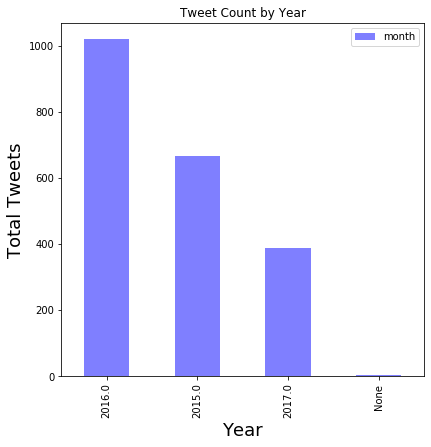

In [99]:
# Ploting Tweet Counts by Year

fig, axs = plt.subplots(figsize=(6.5, 6.5))

twitter_archive_master.tweet_year.value_counts().plot(kind ='bar', alpha=0.5, color = 'blue', label='month', ax=axs)
axs.set_title('Tweet Count by Year')
axs.set_xlabel('Year', fontsize = 18)
axs.set_ylabel('Total Tweets',fontsize = 18)
plt.legend();

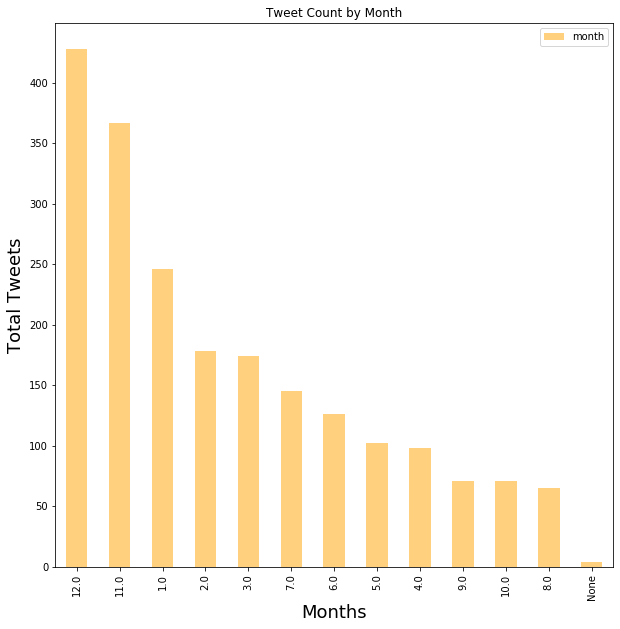

In [100]:
# Ploting Tweet Counts by Month

fig, axs = plt.subplots(figsize=(10, 10))

twitter_archive_master.tweet_month.value_counts().plot(kind ='bar', alpha=0.5, color = 'orange', label='month', ax=axs)
axs.set_title('Tweet Count by Month')
axs.set_xlabel('Months', fontsize = 18)
axs.set_ylabel('Total Tweets',fontsize = 18)
plt.legend();

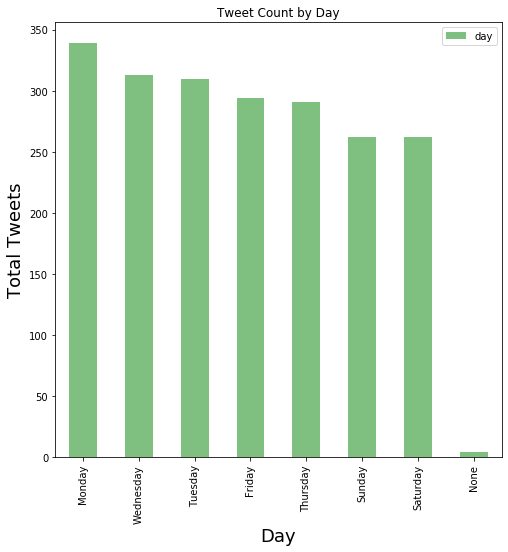

In [101]:
# Ploting Tweet Counts by Day

fig, axs = plt.subplots(figsize=(8, 8))

twitter_archive_master.tweet_day.value_counts().plot(kind ='bar', alpha=0.5, color = 'green', label='day', ax=axs)
axs.set_title('Tweet Count by Day')
axs.set_xlabel('Day', fontsize = 18)
axs.set_ylabel('Total Tweets',fontsize = 18)
plt.legend();